## 时间维度
对于时间维度，首先收集了位于 data point 中 outs 与 data 在时间维度的绝对误差。研究中，在有预训练的情况下采用如下随机选取时间点的方式训练 2000 epochs 

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
loss_log = np.load("./checkpoint/Log_18p_pre_2k.npy", allow_pickle=True)
eq_loss = [i["eq"] for i in loss_log]
data_loss = [i["data"] for i in loss_log]

In [67]:
eq_loss = np.array(eq_loss)
data_loss = np.array(data_loss)
print("eq_loss shape:", eq_loss.shape)
print("data_loss shape:", data_loss.shape)
loss = np.sqrt(eq_loss**2 + data_loss**2)
sum_loss = np.sum(loss, axis=1)
print(sum_loss.shape)

eq_loss shape: (2000, 3, 5094)
data_loss shape: (2000, 3, 5094)
(2000, 5094)


In [68]:
np.random.seed(1)
time_tmp = np.linspace(1, 50, 50, endpoint=True).astype(int)
time_array = np.random.choice(time_tmp, 18)
time_array.sort()
print(time_array)

[ 1  2  6  7  8  9 10 12 13 13 16 17 21 26 38 38 44 46]


In [69]:
sum_loss= sum_loss.reshape((len(eq_loss),len(time_array),-1))
print(sum_loss.shape) # epoch timepoint samplepoimt

(2000, 18, 283)


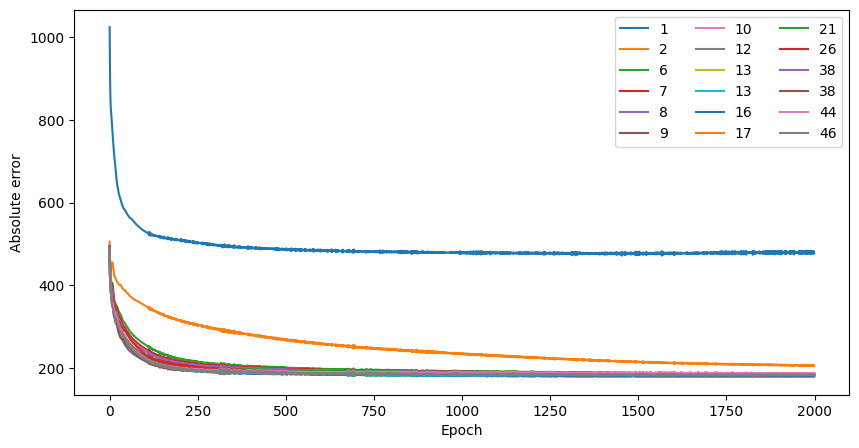

In [70]:
time_loss = np.sum(sum_loss, axis=2)
plt.figure(figsize=(10, 5))
for i, time in enumerate(time_loss.T):
    plt.plot(time, label=str(time_array[i]))

plt.legend(ncol=3)
plt.xlabel("Epoch")
plt.ylabel("Absolute error")
plt.show()


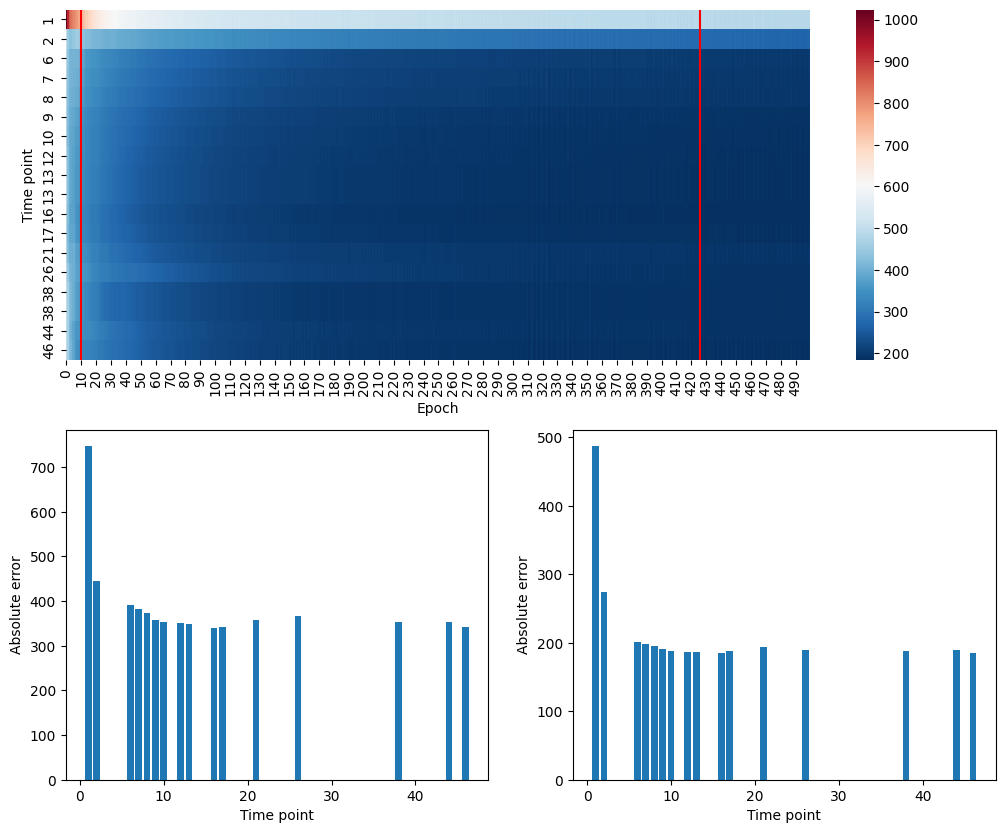

In [73]:
plt.figure(figsize=(12, 10))
plt.subplot(211)
sns.heatmap(time_loss[:500].T, cmap="RdBu_r", yticklabels=time_array)
plt.xlabel("Epoch")
plt.ylabel("Time point")
plt.vlines([10, 426], 0, 18, colors="r")

plt.subplot(223)
plt.bar(time_array, time_loss[10])
plt.xlabel("Time point")
plt.ylabel("Absolute error")

plt.subplot(224)
plt.bar(time_array, time_loss[426])
plt.xlabel("Time point")
plt.ylabel("Absolute error")
plt.show()

在时间纬度上，呈现出一种时间点越靠前，收敛越慢的样子。 这是时间点数据所取决于，而并非网络训练的倾重。 

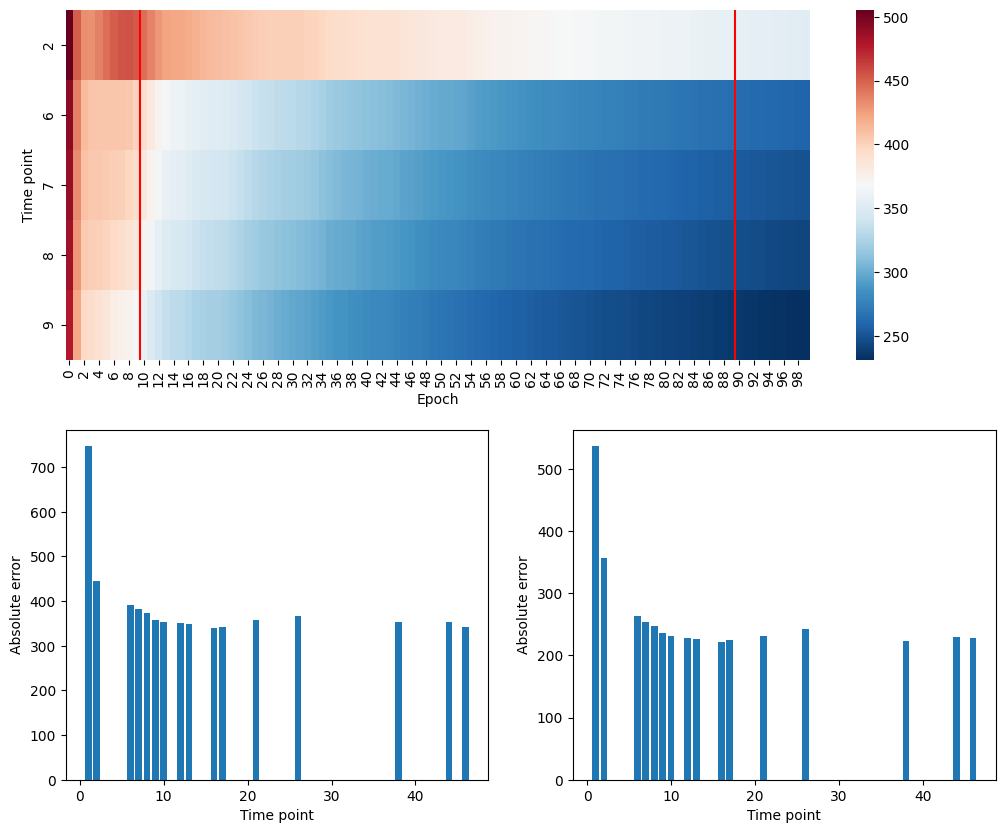

In [80]:
plt.figure(figsize=(12, 10))
plt.subplot(211)
sns.heatmap(time_loss[:100, 1:6].T, cmap="RdBu_r", yticklabels=time_array[1:6])
plt.xlabel("Epoch")
plt.ylabel("Time point")
plt.vlines([10, 90], 0, 18, colors="r")

plt.subplot(223)
plt.bar(time_array, time_loss[10])
plt.xlabel("Time point")
plt.ylabel("Absolute error")

plt.subplot(224)
plt.bar(time_array, time_loss[90])
plt.xlabel("Time point")
plt.ylabel("Absolute error")
plt.show()
